# MEF en 1D

Ejecutar este documento en forma dinámica: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/fem1D.ipynb)


## Introducción

El Método de Elementos Finitos (**FEM**) es un método numérico que nos permite computar las soluciones de [ecuaciones en dervidas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) ([**PDE**](https://en.wikipedia.org/wiki/Partial_differential_equation)). Para que tenga solución única se necesita el valor de la solución en la frontera (condición de borde). En general, estos problemas no se pueden resolver de manera analítica por eso el método es de tanta utilidad (también existen otros métodos, por ejemplo, diferencias finitas). En este tutorial comenzaremos a desarrollar el método en su versión unidimensional con un ejemplo de utilidad que tiene solución analítica: [**la ecuación de Poisson**](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Poisson). Esta ecuación tiene la forma:

$$ \left \{ \begin{array}{l} -u^{''}=f \ \ \text{ para } \ \ x\in I=\left(0,1 \right) \\   u(0)=u(1)=0  \ \ \text{estas son las condiciones de borde} \end{array} \right . \tag{1}$$

Aquí hemos introducido una notación en la cual $u''$ es equivalente a escribir $\frac{\partial^{2} u}{\partial x^{2}}$. Debe quedar claro que el objetivo aquí es encontrar la función $u(x)$ que cumple la Ec. (1) (obviamente también cumple las condiciones de borde). También hay que remarcar que $f$ puede ser función de $x$, es decir, $f(x)$ pero es conocida.
- - -
**Ejemplo 1**:  Se puede verificar que la función $u = \frac{x(1-x)}{2}$ es solución cuando $f=1$ y $u(0)=u(1)=0$ (es decir para un intervalo $I=\left(0,1 \right)$). ¡Verifíquelo!
- - -
Para un $f(x)$ general no es tan fácil, y no queda otra alternativa que obtener la solución de forma numérica.

## Formulación variacional

La solución utilizando FEM siempre comienza por reescribir la Ec. (1) en la denominada **forma variacional**. Esto se realiza multiplicando la ecuación por una función de prueba $v$ (**test function**) e integrando en el dominio definido. 

$$-u^{''} v = f v \ \ \Rightarrow  -\int_{0}^{1}u^{''} \ \ v \ \ dx = \int_{0}^{1}f \ \ v \ \ dx \tag{2}$$

Note que la parte izquierda de esta ecuación tiene una segunda derivada. Por razones que veremos más adelante, es conveniente bajar el orden de esta derivada. Para esto se integra por partes, si recuerdan como era:

$$\int_{x_{1}}^{x_{2}}f_{1}f_{2}^{'}dx = \left. f_{1}f_{2} \ \ \right |_{x_{1}}^{x_{2}}- \int_{x_{1}}^{x_{2}}f_{1}^{'}f_{2}dx \tag{3}.$$

Llamando $f_{1}=v$ y $f_{2}=u^{'}$ entonces queda:

$$-\left[ \left. u^{'}v \ \ \right |_{0}^{1}-\int_{0}^{1}v^{'}u^{'}dx\right] = \int_{0}^{1} fvdx$$

computando en los límites:

$$\int_{0}^{1}v^{'}u^{'}dx + u^{'}(0)v(0) - u^{'}(1)v(1) = \int_{0}^{1} fvdx.$$

Ahora, recordemos que multiplicamos por una función de prueba $v$ que, en principio, le podemos pedir cualquier cosa porque la hemos propuesto nosotros. Le pedimos entonces que se cumpla $v(0)=0$ y $v(1)=0$ (esto si no nos interesa o no tenemos restricción para los valores de la función en $u^{'}$ en 0 y 1). De esta forma la ecuación anterior nos queda:

$$\int_{0}^{1}v^{'}u^{'} \ \ dx = \int_{0}^{1} fv \ \ dx  \ \ \ \ \forall v \in V_{0}.\tag{4}$$

Aquí $V_{0}$ es el dominio donde vive $v$ y le vamos a pedir también que $v$ se comporte bien, por eso este dominio tendrá que ser: 

$$V_{0} = \left\{ v: \left\| v^{'}\right\| < \infty , \left\| v \right\| < \infty ,   v(0)=0,v(1)=0\right\}$$

Otro comentario más, a la función $u$ (que es la solución que estamos buscando) se le suele decir función ensayo (**trial function**).

## Aproximación por elementos finitos

El siguiente paso es aproximar $u$, que es la solución y puede ser cualquier función, por otra continua y lineal a trozos (algo de lo que vimos en el tutorial anterior). Entonces, ahora en lugar utilizar el espacio $V_{0}$, utilizaremos el $V_{h}$ (definido en la Ec. (4) del [tutorial anterior](https://nbviewer.jupyter.org/github/rirastorza/Intro2FEM/blob/master/Polinomios_constantes_atrozo/polinomios.ipynb)). También le pediremos que se cumpla $v(0)=0$ y $v(1)=0$. Entonces resolveremos:

$$\int_{0}^{1}u_{h}^{'}v^{'} \ \ dx = \int_{0}^{1} fv \ \ dx   \ \ \ \ \forall v \in V_{h} \tag{5}$$

A esto se le dice método de [Galerkin](https://en.wikipedia.org/wiki/Boris_Galerkin), en honor a quien lo propuso. Remarcamos que tanto $u_{h}$ como $v$ pertenecen al espacio $V_{h}$, esto es porque también $u_{h}$ vale cero en los bordes (valores frontera).

### Sistema de ecuaciones lineales

La idea es resolver de manera numérica la Ec. (1), hasta ahora hemos hecho algunos cálculos que facilitan la resolución pero no hemos resuelto nada todavía. Lo que vamos a hacer es pasar de una ecuación con integrales (Ec. (5)) a un sistema de ecuaciones lineales cuya solución serán unos pesos ($\xi_{i}$, algo parecido a la Ec. (13) del [tutorial anterior](https://nbviewer.jupyter.org/github/rirastorza/Intro2FEM/blob/master/Polinomios_constantes_atrozo/polinomios.ipynb)) que nos permitirán construir nuestra solución aproximada $u_{h}$. El sistema de ecuaciones lineales lo expresaremos de la forma:

$$A\xi = b$$

donde $A$ es una matriz de $(n-1)\times (n-1)$, $\xi$ y $b$ son vectores de $(n-1)\times 1$. Tomaremos la función de prueba $v=\varphi_{i}(x)$ con $i=1,\dots,n-1$ (las funciones sombrero), dado que $v$ debe ser cero en los bordes (por eso no están $i=0$ e $i=n$). Por lo tanto si expresamos la Ec. (5) con esta $v$ tendremos:

$$ \int_{0}^{1}u_{h}^{'}\varphi_{i}^{'}(x) \ \ dx = \int_{0}^{1} f \varphi_{i}(x) \ \ dx    \tag{6}.$$

Esto vale para $i=1,\dots,n-1 $. Como $u_{h}$ también pertenece a $V_{h}$ entonces también la podemos escribir como combinación lineal de las funciones sombrero ($\varphi_{j}$, le ponemos otro subíndice para distinguirlas):

$$ u_{h} = \sum_{j=1}^{n-1} \xi_{j} \varphi_{j} \tag{7}.$$

esto lo reemplazo en la Ec. (6) y nos queda:

$$ \int_{0}^{1} \left( \sum_{j=1}^{n-1} \xi_{j} \varphi_{j} \right)^{'} \varphi_{i}^{'} dx = \int_{0}^{1} \sum_{j=1}^{n-1} \xi_{j} \left( \varphi_{j} \right)^{'} \varphi_{i}^{'} dx = \sum_{j=1}^{n-1} \xi_{j} \int_{0}^{1} \varphi_{j}^{'} \varphi_{i}^{'} dx = \int_{0}^{1} f \varphi_{i} \ \ dx.$$

Ahora introducimos la notación:

$$ A_{ij} = \int_{0}^{1} \varphi_{j}^{'} \varphi_{i}^{'} dx \ \ \text{con} \ \ i,j=1,\dots, n-1 \tag{8}$$

$$b_{i}=\int_{0}^{1} f \varphi_{i} \ \ dx \ \ \text{con} \ \ i=1,\dots, n-1\tag{9}$$

Noten que aquí las incógnitas son los $\xi_{j}$ debemos expresar esto de la siguiente forma:

$$ \begin{bmatrix} A_{11} & A_{12} & \cdots & A_{1(n-1)} \\ A_{21} & \ddots & \cdots & \vdots \\ \vdots &  &  & \vdots \\  A_{(n-1)1} & \cdots & \cdots & A_{(n-1)(n-1)} \end{bmatrix} \begin{bmatrix} \xi_{1} \\ \xi_{2} \\ \vdots \\ \xi_{n-1} \end{bmatrix}= \begin{bmatrix} b_{1} \\ b_{2} \\ \vdots \\ b_{n-1} \end{bmatrix} \tag{10}$$

A la matriz $A$ se le dice **matriz de rigidéz** (stifness matrix) y a $b$ se le dice **vector de cargas** (load vector).

***

Concluyendo, el **algoritmo** deberá realizar las siguientes operaciones:

1. Crear la malla en $I$, esto determinará el espacio $V_{h}$
2. Computar $A$ y $b$ con las Ecs. (8) y (9) y armar la matriz $A$ y el vector $b$ de la Ec. (10)
3. Resolver el sistema de ecuaciones (Ec. (10))
4. Calcular la solución aproximada: $u_{h}= \sum_{j=1}^{n-1} \xi_{j} \varphi_{j}$

***

### Implementamos el algoritmo

Recordemos que las funciones sombrero se definen de la forma:


$$ \varphi_{j}(x_{i})= \left \{ \begin{array}{l} \frac{x-x_{i-1}}{h_{i}} \ \ \text{ si } \ \ x\in I_{i} \\  \frac{x_{i+1}-x}{h_{i+1}}  \ \ \text{ si }  \ \ x\in I_{i+1}\\ 0  \ \ \text{caso contrario} \end{array} \right .$$

entonces su derivada será:

$$ \varphi^{'}_{j}(x_{i})= \left \{ \begin{array}{l} \frac{1}{h_{i}} \ \ \text{ si } \ \ x\in I_{i} \\  \frac{-1}{h_{i+1}}  \ \ \text{ si }  \ \ x\in I_{i+1}\\ 0  \ \ \text{caso contrario} \end{array} \right .$$

Ahora veremos que valores toma el producto $\varphi_{i}^{'}\varphi_{j}^{'}$. Veamos algunos ejemplos (probar modificando las variables $I$ y $J$).

h:  0.2


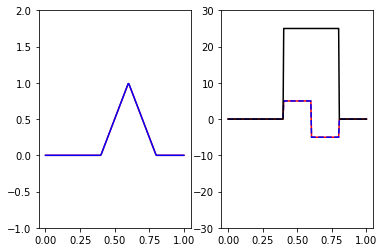

In [1]:
from __future__ import print_function
import numpy as np #importo numpy y lo denomino np
import matplotlib.pyplot as plt
%matplotlib inline

#Definimos la función sombrero
def phi(x,xi,i):
    hi = xi[1]-xi[0]
    f = np.zeros_like(x)
    for m in range(len(x)):
        if i == 0:
            if xi[i] <= x[m] < xi[i+1]:
                f[m] = (xi[i+1]-x[m])/(xi[i+1]-xi[i])
            else:
                f[m] = 0.0        
        elif i == len(xi):
            if (xi[i-1] < x[m] <= xi[i]):
                f[m] = (x[m]-xi[i-1])/(xi[i]-xi[i-1])
            else:
                f[m] = 0.0
        else:
            if (xi[i-1] < x[m] <= xi[i]):
                f[m] = (x[m]-xi[i-1])/(xi[i]-xi[i-1])
            elif xi[i] < x[m] <= xi[i+1]:
                f[m] = (xi[i+1]-x[m])/(xi[i+1]-xi[i])
            else:
                f[m] = 0.0
        
    return f

#Definimos la función derivada de la función sombrero
def dphi(x,xi,i):
    hi = xi[1]-xi[0]
    f = np.zeros_like(x)
    for m in range(len(x)):
        if (xi[i-1] <= x[m] < xi[i]):
            f[m] = 1.0/(xi[i]-xi[i-1])
        elif xi[i] <= x[m] < xi[i+1]:
            f[m] = -1.0/(xi[i+1]-xi[i])
        else:
            f[m] = 0.0
    return f

nx = 5 #numero de intervalos
nodos = nx+1 #cantidad de nodos
xi = np.linspace(0,1,nodos) #nodos equiespaciados
x = np.linspace(0,1,200) #continuo

print('h: ',xi[1]-xi[0])

I = 3
J = 3

phi_I = phi(x,xi,I)#phi_i
phi_J = phi(x,xi,J)#phi_j
dphi_I = dphi(x,xi,I)#phi_i
dphi_J = dphi(x,xi,J)#phi_j
fig, axs = plt.subplots(1,2)
axs[0].plot(x,phi_I,'r')
axs[0].plot(x,phi_J,'b')
axs[0].set_ylim(-1,2)
#axs[0].axhline(0, color='gray');
axs[1].plot(x,dphi_I,'r-')
axs[1].plot(x,dphi_J,'b--')
axs[1].plot(x,dphi_J*dphi_I,'k')
axs[1].set_ylim(-30,30);
#axs[1].axhline(0, color='gray');

Si la malla es uniforme y el tamaño es $h$, de lo anterior podemos concluir:

1. Para $i=j$:

$$ A_{ii} = \int_{0}^{1} \left(\varphi_{i}^{'}\right)^{2} dx = \frac{2}{h} $$

2. Para $j = i+1$

$$ A_{i(i+1)} = \int_{0}^{1} \varphi_{i}^{'}\varphi_{i+1}^{'} dx =\int_{x_{i}}^{x_{i+1}} \varphi_{i}^{'}\varphi_{i+1}^{'} dx = \int_{x_{i}}^{x_{i+1}} (\frac{-1}{h})\frac{1}{h} dx = \frac{-1}{h} $$

3. En los demás casos vale cero.

Por lo tanto la **matriz de rigidez** (Ec. (8)) quedará de la siguiente forma:

$$ A = \begin{bmatrix} \frac{2}{h} & \frac{-1}{h} & \cdots & 0 \\ \frac{-1}{h} & \ddots & \cdots & \vdots \\ \vdots &  &  & \vdots \\  0 & \cdots & \cdots & \frac{2}{h} \end{bmatrix} \tag{11}$$

Ahora veamos los $b_{i}$, tomemos un ejemplo, el que resolvimos de manera analítica, es decir donde $f=1$ (es constante). La Ec. (9) nos quedaría:

$$b_{i}=\int_{0}^{1} f \varphi_{i} \ \ dx = \int_{0}^{1} f \varphi_{i} \ \ dx = \int_{x_{i-1}}^{x_{i}}\frac{x_{i-1}-x}{h} dx +\int_{x_{i}}^{x_{i+1}}\frac{x-x_{i+1}}{h} dx = h$$

Si $f$ fuera cualquier función entonces deberíamos aproximar esta ecuación, por ejemplo, por una integración por el [**método trapezoidal**](https://es.wikipedia.org/wiki/Regla_del_trapecio). En ese caso nos quedaría:

$$b_{i}= \int_{x_{i-1}}^{x_{i}}f\varphi_{i} dx +\int_{x_{i}}^{x_{i+1}}f\varphi_{i} dx = \left[f(x_{i-1})\varphi_{i}(x_{i-1})+f(x_{i})\varphi_{i}(x_{i})\right]\frac{h}{2} +\left[f(x_{i})\varphi_{i}(x_{i})+f(x_{i+1})\varphi_{i}(x_{i+1})\right]\frac{h}{2} = f(x_{i})h\tag{12}$$

Tomando entonces la Ec. (12) podemos escribir el vector $b$:

$$ b = \begin{bmatrix} f(x_{1})h\\f(x_{2})h\\ \vdots \\ f(x_{n-1})h  \end{bmatrix} \tag{13}$$

Estamos en condiciones de implementarlo tomando las Ecs. (11) y (13), veamos el ejemplo5.py. Acá lo repetimos.

[[0.045]
 [0.08 ]
 [0.105]
 [0.12 ]
 [0.125]
 [0.12 ]
 [0.105]
 [0.08 ]
 [0.045]]
[0.045 0.08  0.105 0.12  0.125 0.12  0.105 0.08  0.045]


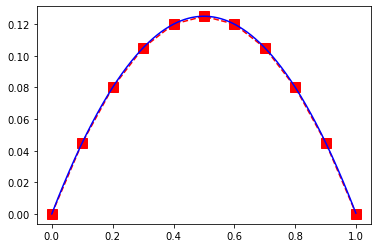

In [2]:
#Puntos de x0 a xnx
nx = 10 #numero de intervalos
nodos = nx+1 #cantidad de nodos

uh = np.zeros((nx+1,1))
h = 1./(nx)
Apre = (2./h)*np.eye(nx-1) #(n-1)*(n-1)

rows, cols = np.indices((nx-1,nx-1))
row_vals = np.diag(rows, k=-1)
col_vals = np.diag(cols, k=-1)
z1 = np.zeros((nx-1,nx-1))
z1[row_vals, col_vals]=-1./h

row_vals = np.diag(rows, k=1)
col_vals = np.diag(cols, k=1)
z2 = np.zeros((nx-1,nx-1))
z2[row_vals, col_vals]=-1./h

A = Apre+z1+z2 #Matriz de rigidez
f = 1.
b = f*h*np.ones((nx-1,1))#vector

#Calculo la solución
psi = np.linalg.solve(A, b)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1)

print(psi)

print(np.reshape(psi, nx-1))

##import numpy as np
psinew =np.append([0],np.reshape(psi, nx-1))
uh =np.append(psinew,[0])
#print(psinew)

xu = np.linspace(0, 1.0, nx+1,endpoint = True)


axs.plot(xu,uh,'--rs',markersize=10)

#Comparo con solucion exacta
xe = np.arange(0.0,1.0,0.001)
ue = -0.5*xe*(xe-1.)
axs.plot(xe,ue,'b');